# 📘 Optimization 01: Understanding Convexity and Smoothness

## 🎯 Learning Objectives
- Understand what it means for a function to be **convex** or **non-convex**
- Recognize the difference between **smooth** and **non-smooth** functions
- Build visual intuition by plotting simple example functions
- Connect these properties to real-world implications in machine learning optimization

## 🧠 Why it matters
In machine learning, we aim to minimize a **loss function**. The shape of this function (convex vs. non-convex) and its surface (smooth vs. non-smooth) directly affect:
- Whether we can find a **global minimum**
- How easily optimization algorithms converge
- What kind of initialization or regularization might be necessary

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# x 범위 설정
x = np.linspace(-5, 5, 500)

# 예시 함수들
f_convex_smooth     = x**2
f_convex_nonsmooth  = np.abs(x)
f_nonconvex_smooth  = np.sin(x)
f_nonconvex_nonsmooth = np.sign(x)

### 🔍 Visualizing Convexity and Smoothness

In the plots above, we see four representative types of functions:

- **Top-left (`x²`)**: Convex and smooth – this is ideal for optimization. Gradient descent performs well.
- **Top-right (`|x|`)**: Convex but non-smooth – there's a sharp point at x = 0, which makes gradient undefined there.
- **Bottom-left (`sin(x)`)**: Smooth but non-convex – multiple local minima make optimization harder.
- **Bottom-right (`sign(x)`)**: Non-convex and non-smooth – discontinuous jumps lead to unstable optimization behavior.

We'll refer back to these behaviors when we look at loss functions like MSE, MAE, and Huber in later notebooks.

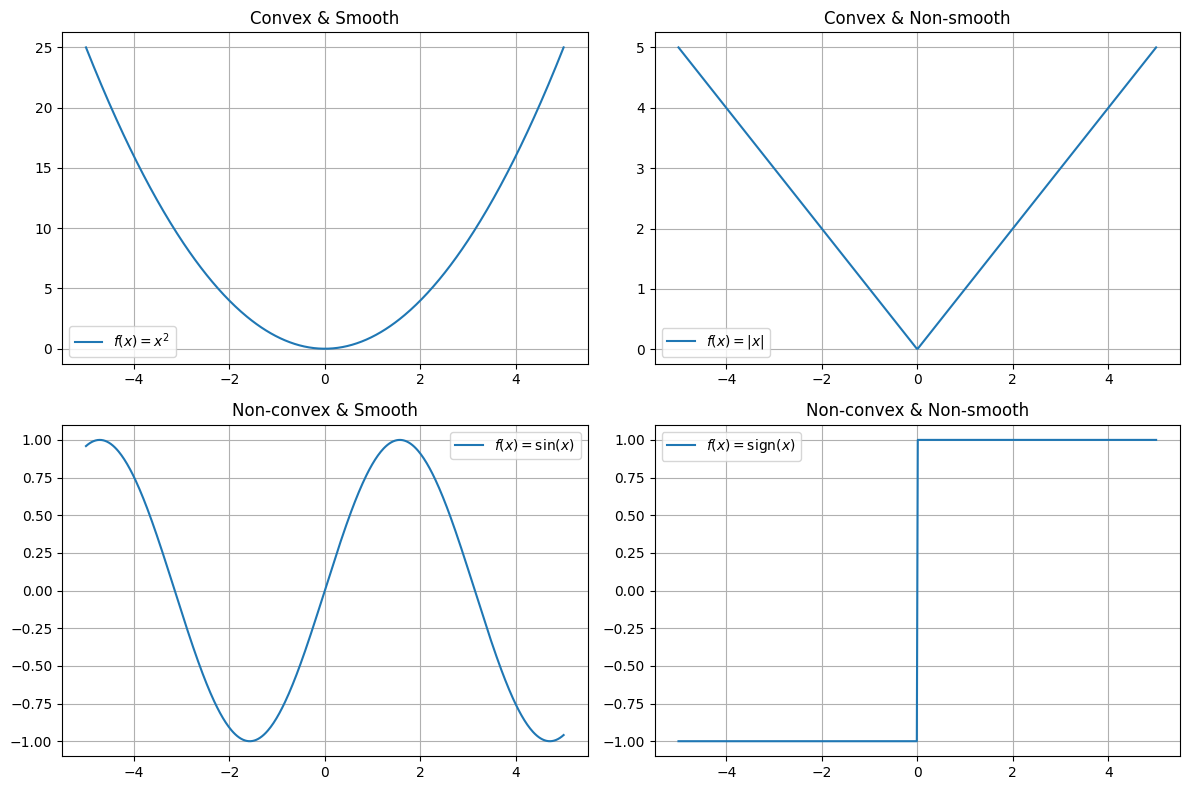

In [3]:
# 그래프 시각화
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(x, f_convex_smooth, label=r'$f(x) = x^2$')
plt.title("Convex & Smooth")
plt.grid(True)
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(x, f_convex_nonsmooth, label=r'$f(x) = |x|$')
plt.title("Convex & Non-smooth")
plt.grid(True)
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(x, f_nonconvex_smooth, label=r'$f(x) = \sin(x)$')
plt.title("Non-convex & Smooth")
plt.grid(True)
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(x, f_nonconvex_nonsmooth, label=r'$f(x) = \mathrm{sign}(x)$')
plt.title("Non-convex & Non-smooth")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

### 🔍 Testing Convexity with Linear Interpolation

To visually test convexity, we:
- Pick two points on the function, \( x_1 \) and \( x_2 \)
- Draw the linear interpolation between \( f(x_1) \) and \( f(x_2) \)
- Compare it to the actual function values in between

- In the **left plot** (`x²`), the function always lies **below** the red dashed line → this confirms it is convex.
- In the **right plot** (`sin(x)`), the function dips **above** and **below** the red line → it is **not convex**.

This geometric view of convexity is foundational for understanding optimization landscapes.

---

### 🧠 Why Convexity Matters in Optimization

Convexity guarantees that:
- **Every local minimum is also the global minimum**
- So, if an optimization algorithm (like gradient descent) finds **any minimum**, we can trust it is the best possible solution

But why do we care about finding the global minimum?

- Because **the goal of optimization is to find where the loss is smallest**, which is where the model performs best
- In gradient-based methods, we move downhill by following the **negative gradient**
- These methods stop (converge) when the gradient is **zero**
- If the function is convex, then this “flat point” (gradient = 0) is guaranteed to be the **global minimum**

✅ Therefore, convexity ensures that gradient descent doesn't just stop somewhere — it stops at the **best possible solution**

✅ MSE/MAE, CrossEntropy 등의 실제 손실함수에 대해 “이 함수는 convex하니까 gradient descent가 잘 작동하겠군”이라는 식으로 판단할 수 있게 됨

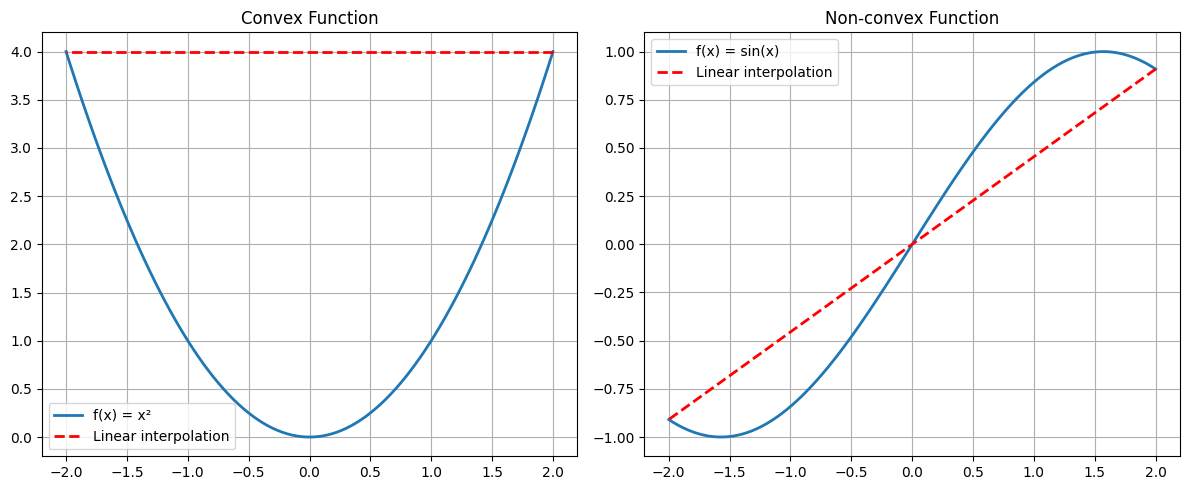

In [5]:
# 실험용 함수들
def f_convex(x):
    return x**2

def f_nonconvex(x):
    return np.sin(x)

# 두 점 설정
x1, x2 = -2, 2
lambdas = np.linspace(0, 1, 100)
x_line = lambdas * x1 + (1 - lambdas) * x2

# 직선 연결값 (선형보간)
y_line_convex = lambdas * f_convex(x1) + (1 - lambdas) * f_convex(x2)
y_line_nonconvex = lambdas * f_nonconvex(x1) + (1 - lambdas) * f_nonconvex(x2)

# 함수 자체값
y_curve_convex = f_convex(x_line)
y_curve_nonconvex = f_nonconvex(x_line)

# 시각화
plt.figure(figsize=(12, 5))

# Convex 예시
plt.subplot(1, 2, 1)
plt.plot(x_line, y_curve_convex, label='f(x) = x²', linewidth=2)
plt.plot(x_line, y_line_convex, 'r--', label='Linear interpolation', linewidth=2)
plt.title("Convex Function")
plt.legend()
plt.grid(True)

# Non-convex 예시
plt.subplot(1, 2, 2)
plt.plot(x_line, y_curve_nonconvex, label='f(x) = sin(x)', linewidth=2)
plt.plot(x_line, y_line_nonconvex, 'r--', label='Linear interpolation', linewidth=2)
plt.title("Non-convex Function")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

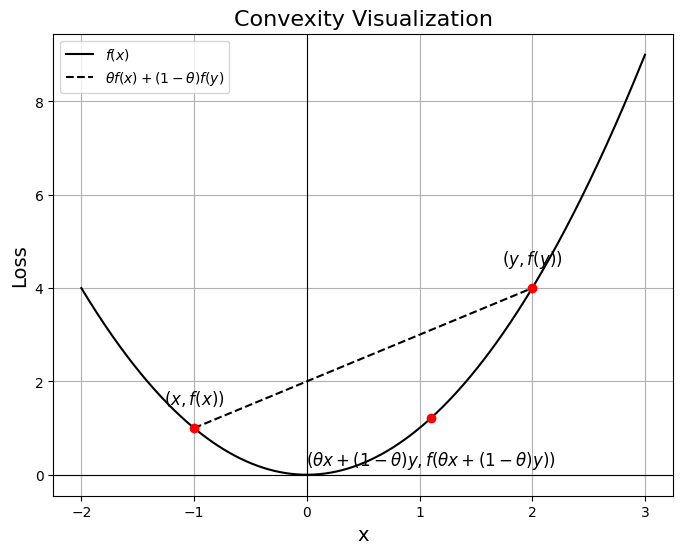

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Convex 함수 정의
def f(x):
    return x**2

# 2. x, y 두 점 정의
x0 = -1
x1 = 2

# 3. theta 값 정의 (0 ~ 1 사이)
theta = 0.3

# 4. 중간점 계산
mid_x = theta * x0 + (1 - theta) * x1
mid_y = f(mid_x)

# 5. 그림 그리기
x_vals = np.linspace(-2, 3, 500)
y_vals = f(x_vals)

plt.figure(figsize=(8, 6))

# 함수 곡선
plt.plot(x_vals, y_vals, label=r'$f(x)$', color='black')

# 점 찍기
plt.scatter([x0, x1, mid_x], [f(x0), f(x1), mid_y], color='red', zorder=5)

# 점선: (x0, f(x0)) - (x1, f(x1)) 연결
plt.plot([x0, x1], [f(x0), f(x1)], 'k--', label=r'$\theta f(x) + (1-\theta)f(y)$')

# 라벨링
plt.text(x0, f(x0)+0.5, r'$(x, f(x))$', fontsize=12, ha='center')
plt.text(x1, f(x1)+0.5, r'$(y, f(y))$', fontsize=12, ha='center')
plt.text(mid_x, mid_y-1.0, r'$(\theta x + (1-\theta) y, f(\theta x + (1-\theta) y))$', fontsize=12, ha='center')

# 축, 제목 설정
plt.xlabel('x', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.title('Convexity Visualization', fontsize=16)

plt.legend()
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.8)
plt.axvline(0, color='black', linewidth=0.8)

plt.show()


### 🎯 Gradient Descent Behavior: Convex vs Non-convex

These plots show how gradient descent behaves differently depending on the function:

- **Left: Convex (`x²`)**
  - All starting points converge smoothly to the same global minimum at `x = 0`
  - Gradient descent is reliable and predictable

- **Right: Non-convex (`sin(x)`)**
  - Depending on the starting point, gradient descent can stop at **different local minima**
  - Optimization becomes sensitive to initialization and step size

✅ This is why **convexity gives us strong guarantees** in optimization:
- When the gradient becomes zero, we can trust we’ve found the best possible solution.
- In non-convex functions, the same gradient condition may lead to suboptimal results.

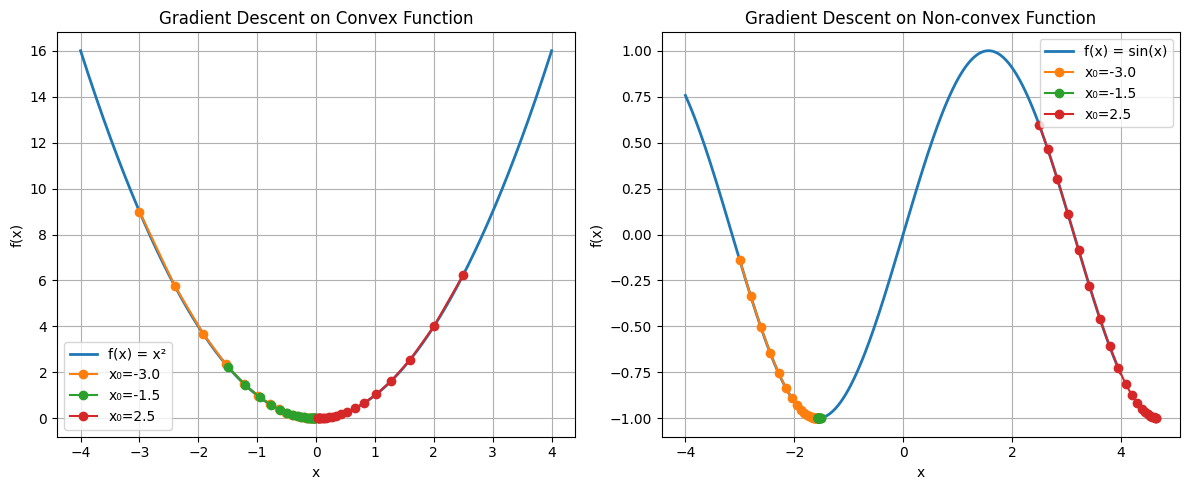

In [9]:
# Gradient descent 경로 시각화를 위한 함수
def gradient_descent(f, grad_f, x0, lr=0.1, steps=20):
    path = [x0]
    x = x0
    for _ in range(steps):
        x = x - lr * grad_f(x)
        path.append(x)
    return np.array(path)

# 정의: 함수 및 도함수
f_convex = lambda x: x**2
grad_convex = lambda x: 2*x

f_nonconvex = lambda x: np.sin(x)
grad_nonconvex = lambda x: np.cos(x)

# 초기값 여러 개로 실험
x0_list = [-3.0, -1.5, 2.5]

# x축 정의
x_plot = np.linspace(-4, 4, 500)
y_convex = f_convex(x_plot)
y_nonconvex = f_nonconvex(x_plot)

plt.figure(figsize=(12, 5))

# Convex plot
plt.subplot(1, 2, 1)
plt.plot(x_plot, y_convex, label='f(x) = x²', linewidth=2)
for x0 in x0_list:
    path = gradient_descent(f_convex, grad_convex, x0)
    plt.plot(path, f_convex(path), 'o-', label=f'x₀={x0}')
plt.title("Gradient Descent on Convex Function")
plt.xlabel("x"); plt.ylabel("f(x)")
plt.legend()
plt.grid(True)

# Non-convex plot
plt.subplot(1, 2, 2)
plt.plot(x_plot, y_nonconvex, label='f(x) = sin(x)', linewidth=2)
for x0 in x0_list:
    path = gradient_descent(f_nonconvex, grad_nonconvex, x0, lr=0.2)
    plt.plot(path, f_nonconvex(path), 'o-', label=f'x₀={x0}')
plt.title("Gradient Descent on Non-convex Function")
plt.xlabel("x"); plt.ylabel("f(x)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

### 🧠 Smooth vs Non-smooth Functions

In the plots above, we compare:

- `x²`: Smooth — the gradient is continuous and changes gradually.
- `|x|`: Non-smooth — the gradient has a **jump discontinuity** at `x = 0`. There's no unique tangent line at that point.

This matters in optimization:
- Smooth functions allow gradient-based methods (like gradient descent) to flow steadily.
- Non-smooth points (like the kink at `|x|`) may cause instability or undefined gradients.

Later, this idea helps explain why some loss functions (like MAE) are harder to optimize than others (like MSE).

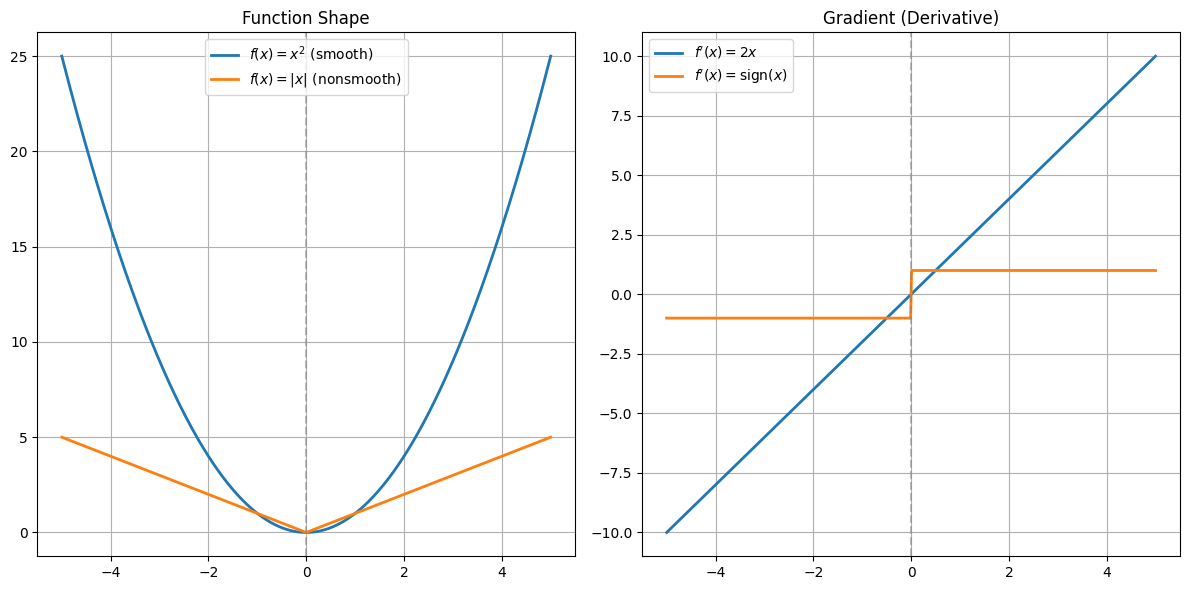

In [6]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5, 5, 500)

# 함수 정의
f_smooth = x**2
f_nonsmooth = np.abs(x)

# 도함수 (기울기) 정의
grad_smooth = 2 * x
grad_nonsmooth = np.sign(x)

# 시각화
plt.figure(figsize=(12, 6))

# 함수 시각화
plt.subplot(1, 2, 1)
plt.plot(x, f_smooth, label=r'$f(x) = x^2$ (smooth)', linewidth=2)
plt.plot(x, f_nonsmooth, label=r'$f(x) = |x|$ (nonsmooth)', linewidth=2)
plt.axvline(0, color='gray', linestyle='--', alpha=0.5)
plt.title("Function Shape")
plt.legend()
plt.grid(True)

# Gradient 시각화
plt.subplot(1, 2, 2)
plt.plot(x, grad_smooth, label=r"$f'(x) = 2x$", linewidth=2)
plt.plot(x, grad_nonsmooth, label=r"$f'(x) = \mathrm{sign}(x)$", linewidth=2)
plt.axvline(0, color='gray', linestyle='--', alpha=0.5)
plt.title("Gradient (Derivative)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

### 🔍 Gradient Descent on Smooth vs Non-smooth Convex Functions

These plots compare how gradient descent behaves on:

- **Left**: a smooth convex function \( f(x) = x^2 \)
- **Right**: a non-smooth convex function \( f(x) = |x| \)

---

### 🧠 Key Observations

- For the **smooth function**:
  - The gradient is well-defined and continuous everywhere.
  - As we get closer to the minimum at \( x = 0 \), the gradient becomes smaller.
  - Gradient descent naturally slows down and smoothly converges to the minimum.

- For the **non-smooth function**:
  - The function is convex but **not differentiable at \( x = 0 \)**.
  - The gradient flips from -1 (left) to +1 (right) at the origin.
  - As a result, gradient descent may **oscillate around 0**, especially with a fixed learning rate.
  - This is because the update direction jumps abruptly:  
    \( x_{t+1} = x_t - \eta \cdot \text{sign}(x_t) \)

---

### ⚙️ How is this handled?

In the code, we use `np.sign(x)` as a **proxy for the subgradient** of \( |x| \).  
This allows the algorithm to keep running even at non-smooth points.

> ⚠️ However, because the subgradient at \( x = 0 \) is not uniquely defined (it's any value in \([-1, 1]\)),  
> the descent may **not settle** smoothly — it can get "stuck" or "bounce" around the minimum.

---

### ✅ Takeaway

- Smoothness ensures stable and predictable convergence.
- Non-smooth functions require careful treatment (e.g., subgradients, decreasing learning rate, or alternative loss functions like Huber).

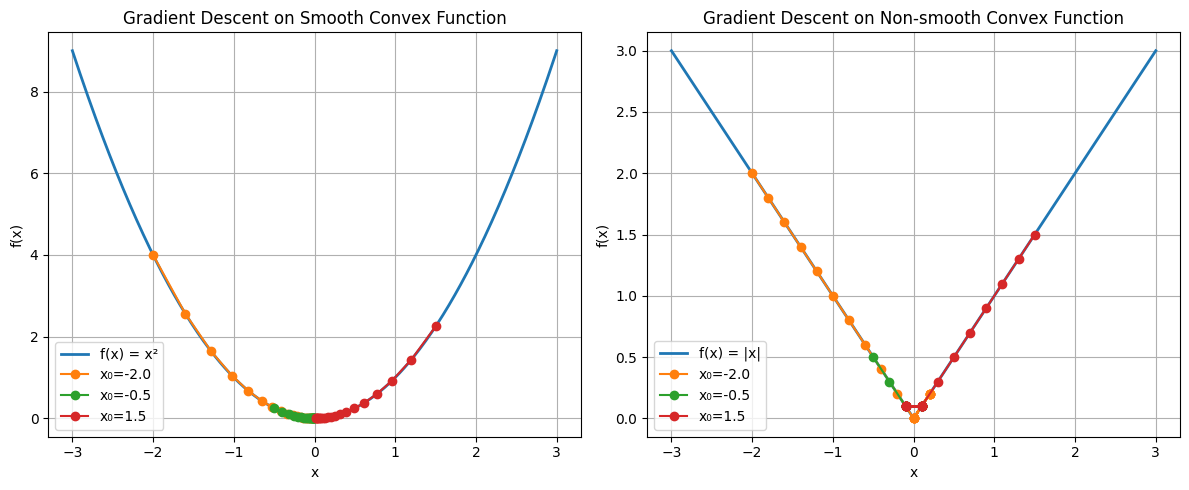

In [10]:
# Gradient descent 함수 (subgradient 허용)
def gradient_descent_subgrad(f, grad_f, x0, lr=0.1, steps=20):
    path = [x0]
    x = x0
    for _ in range(steps):
        grad = grad_f(x)
        x = x - lr * grad
        path.append(x)
    return np.array(path)

# 함수 정의
f_smooth = lambda x: x**2
grad_smooth = lambda x: 2*x

f_nonsmooth = lambda x: np.abs(x)
grad_nonsmooth = lambda x: np.sign(x)  # x=0에서는 0으로 처리

# 초기값 여러 개
x0_list = [-2.0, -0.5, 1.5]

# 그래프 준비
x_plot = np.linspace(-3, 3, 500)
y_smooth = f_smooth(x_plot)
y_nonsmooth = f_nonsmooth(x_plot)

plt.figure(figsize=(12, 5))

# Smooth
plt.subplot(1, 2, 1)
plt.plot(x_plot, y_smooth, label='f(x) = x²', linewidth=2)
for x0 in x0_list:
    path = gradient_descent_subgrad(f_smooth, grad_smooth, x0)
    plt.plot(path, f_smooth(path), 'o-', label=f'x₀={x0}')
plt.title("Gradient Descent on Smooth Convex Function")
plt.xlabel("x"); plt.ylabel("f(x)")
plt.legend(); plt.grid(True)

# Non-smooth
plt.subplot(1, 2, 2)
plt.plot(x_plot, y_nonsmooth, label='f(x) = |x|', linewidth=2)
for x0 in x0_list:
    path = gradient_descent_subgrad(f_nonsmooth, grad_nonsmooth, x0, lr=0.2)
    plt.plot(path, f_nonsmooth(path), 'o-', label=f'x₀={x0}')
plt.title("Gradient Descent on Non-smooth Convex Function")
plt.xlabel("x"); plt.ylabel("f(x)")
plt.legend(); plt.grid(True)

plt.tight_layout()
plt.show()

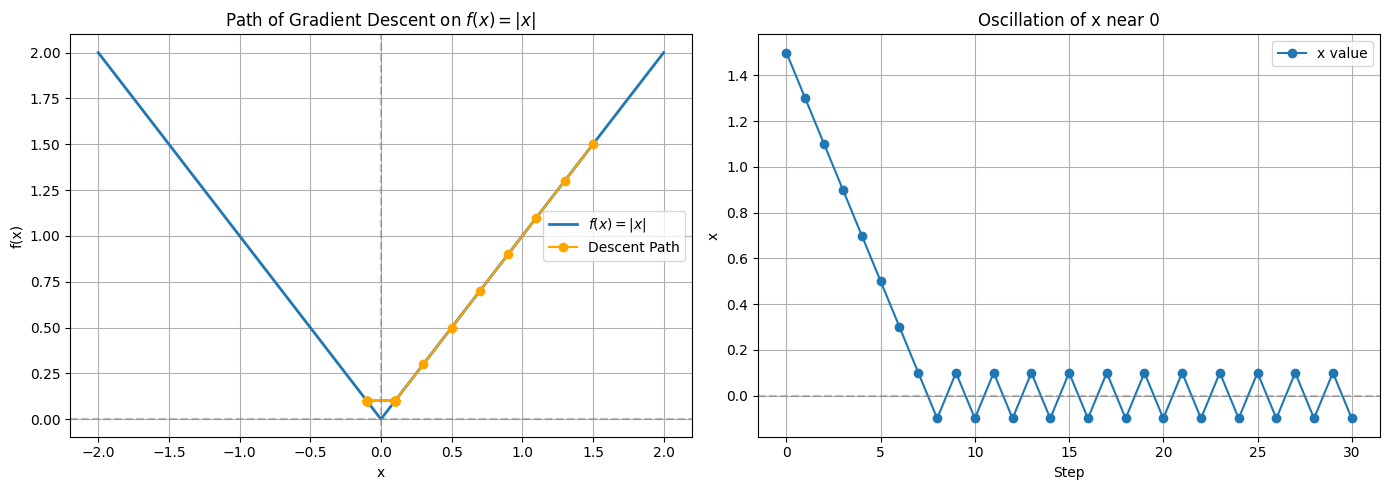

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# 손실 함수 및 기울기
f = lambda x: np.abs(x)
grad = lambda x: np.sign(x)  # x=0에서는 0 (관례적으로)

# Gradient Descent 경로 기록 함수
def gradient_descent_with_logging(f, grad, x0, lr=0.2, steps=30):
    path = [x0]
    for _ in range(steps):
        g = grad(x0)
        x0 = x0 - lr * g
        path.append(x0)
    return np.array(path)

# 초기값
x0 = 1.5
path = gradient_descent_with_logging(f, grad, x0, lr=0.2, steps=30)
f_vals = f(path)

# 플롯 1: 손실 함수 위에 경로
x_plot = np.linspace(-2, 2, 500)
y_plot = f(x_plot)

plt.figure(figsize=(14, 5))

# Plot A: 함수 위에 경로
plt.subplot(1, 2, 1)
plt.plot(x_plot, y_plot, label=r'$f(x) = |x|$', linewidth=2)
plt.plot(path, f_vals, 'o-', color='orange', label='Descent Path')
plt.axhline(0, color='gray', linestyle='--', alpha=0.5)
plt.axvline(0, color='gray', linestyle='--', alpha=0.5)
plt.title("Path of Gradient Descent on $f(x) = |x|$")
plt.xlabel("x"); plt.ylabel("f(x)")
plt.legend(); plt.grid(True)

# Plot B: x 값의 변화 (진동 확인용)
plt.subplot(1, 2, 2)
plt.plot(range(len(path)), path, 'o-', label='x value')
plt.axhline(0, color='gray', linestyle='--', alpha=0.5)
plt.title("Oscillation of x near 0")
plt.xlabel("Step"); plt.ylabel("x")
plt.legend(); plt.grid(True)

plt.tight_layout()
plt.show()